# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [1]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "owl" 
icon_path = "%s.png" % icon

### 데이터 입력

In [6]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("조앤롤링_연설문.txt", 'r', encoding='euc-kr')
message_of_조앤롤링 = f.read()
print(message_of_조앤롤링)
f.close()

Faust 총장님, Harvard 협회와 감독위원회의 위원님들, 
교수진분들, 자랑스러운 학부모님들, 그리고 무엇보다도, 졸업생 여러분. 
제가 가장 처음 말씀드리고 싶은 것은 감사하다는 것입니다. 
저에게 이런 놀라운 영광을 주신 하버드와, 
이 졸업 연설 준비에 공포스럽고 메스꺼웠던 몇 주가 
제 체중이 줄어들게 했습니다. 모두에게 좋은 결과죠? 
이제 제가 해야할 것은 깊이 숨을 들이 마시고, 빨간 현수막을 슬쩍 흘겨 보고, 
제 자신에게 세상에서 제일 큰 그린핀도르 동창회에 있다고 되뇌는 것뿐 입니다. 
졸업 연설을 하는 건 정말 큰 책무입니다. 제 졸업식을 회상할 때까지 이렇게 생각했죠. 
그 날의 연사는 기품 있는 영국 철학가 Baroness Mary Warnock 이였어요. 
그분의 연설을 되돌아 보는 건 제가 이 연설문을 쓰는데 엄청나게 도움이 됐죠. 
제가 그녀가 말했던 어떤 단어도 기억을 하지 못한다는 걸 알아 차렸거든요.
이 속 시원한 발견은 제가 공포심 없이 앞으로 계속 나아가게 했습니다. 
의도치 않게 여러분의 미래를 망칠지도 모른 단 공포심 없이요.  
gay (명랑한/동성애자의) 마법사 육성에 관한 비즈니스, 법 또는 정치 분야에서 촉망받는 여러분들의 미래를. 

보셨죠? 만약 여러분이 앞으로 몇 년 동안 ‘gay 마법사’라는 농담을 기억한다면, 
저는 결과적으로 Baroness Mary Warnock를 앞설 수 있어요. 자기계발을 위한 첫번째 단계인, 성취가능한 목표 죠. 


사실, 저는 제가 오늘 여러분에 말해야만 하는 것들에 대해서 제 스스로를 괴롭혔어요. 
저는 제 자신에게 내가 내 졸업 때 알았더라면 좋았을 것들이 뭔 지, 
그날과 지금 사이의 21년간 내가 배운 것이 뭔 지 물어봤죠.

전 두가지 답을 찾아냈어요. 
우리가 여러분의 학업적 성공을 축하하기위해 함께 모인 이 경이로운 날에, 
저는 먼저 실패의 장점들에 대해 얘기하기로 결정했어요. 
그리고 ‘실제 삶’의 문턱에 서있는 여러분에게, 결정적으로 중요한 ‘상상력’

In [4]:
# 연설문2
# 아래 speech.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("KoreaSummit_Kim.txt", 'r', encoding='euc-kr')
message_of_kim = f.read()
print(message_of_kim)
f.close()

친애하는 여러분 북과 남, 해외의 동포 형제 자매들. 오늘 저와 문재인 대통령은 분열의 비극과 통일의 열망이 응결되어 있는 이곳 판문점에서 역사적인 책임감과 사명감을 안고 첫 회담을 가지었습니다. 

나는 먼저 수뇌상봉과 회담의 성공적인 개최를 위하여 많은 노고를 바치신 문재인 대통령과 남측 관계자 여러분들께 깊은 사의를 표합니다.

또한 우리들을 위해 온갖 정성과 노력을 다 기울이며 성대히 맞이하여 주고 한 혈육, 한 형제, 한민족의 따뜻한 정을 다해준 남녘 동포들에게 감사의 인사를 드립니다.

북과 남이 오늘 이렇게 다시 두 손을 맞잡기까지 참으로 긴 시간이 흘렀고 우리 모두는 너무 오랫동안 이 만남을 한마음으로 기다려왔습니다.

정작 마주 서고 보니 북과 남은 역시 서로 갈라져 살 수 없는 한 혈육이며 그 어느 이웃에도 비길 수 없는 동족이라는 것을 가슴 뭉클하게 절감하게 되었습니다.

이토록 지척에 살고 있는 우리는 대결하여 싸워야 할 이(異)민족이 아니라 단합하여 화목하게 살아야 할 한 핏줄을 이룬 한민족입니다.

하루빨리 온 겨레가 마음 놓고 평화롭게 잘 살아갈 길을 열고 우리 민족의 새로운 미래를 개척해 나갈 결심을 안고 나는 오늘 판문점 분리선을 넘어 여기에 왔습니다.

저와 문재인 대통령은 우리의 상봉을 간절히 바라고 열렬히 지지 성원 하여준 북과 남 온 겨레의 성원과 기대를 무겁게 받아들이고 북남 인민들이 절실히 바라는 문제 해결을 위해 많은 의제들을 진지하게 논의하였습니다.

무엇보다도 온 겨레가 전쟁 없는 평화로운 땅에서 번영과 행복을 누리는 새 시대를 열어나갈 확고한 의지를 같이하고 이를 위한 실천적 대책들을 합의하였습니다.

그리고 이미 채택된 북남 선언들과 모든 합의들을 철저히 이행해 나가는 것으로 관계 개선과 발전의 전환적 국면을 열어나가기로 하였습니다. 

저와 문재인 대통령은 방금 오늘 회담에서 합의된 의제들과 그 구체적 조치들을 반영한 조선반도의 평화와 번영, 통일을 위한 판문점 선언을 채택하고 서명하였습니다.

우리가 오늘 

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [7]:
# 연설문 1번 전처리
message_of_조앤롤링 = message_of_조앤롤링.split('\n\n')
message_of_조앤롤링

['Faust 총장님, Harvard 협회와 감독위원회의 위원님들, \n교수진분들, 자랑스러운 학부모님들, 그리고 무엇보다도, 졸업생 여러분. \n제가 가장 처음 말씀드리고 싶은 것은 감사하다는 것입니다. \n저에게 이런 놀라운 영광을 주신 하버드와, \n이 졸업 연설 준비에 공포스럽고 메스꺼웠던 몇 주가 \n제 체중이 줄어들게 했습니다. 모두에게 좋은 결과죠? \n이제 제가 해야할 것은 깊이 숨을 들이 마시고, 빨간 현수막을 슬쩍 흘겨 보고, \n제 자신에게 세상에서 제일 큰 그린핀도르 동창회에 있다고 되뇌는 것뿐 입니다. \n졸업 연설을 하는 건 정말 큰 책무입니다. 제 졸업식을 회상할 때까지 이렇게 생각했죠. \n그 날의 연사는 기품 있는 영국 철학가 Baroness Mary Warnock 이였어요. \n그분의 연설을 되돌아 보는 건 제가 이 연설문을 쓰는데 엄청나게 도움이 됐죠. \n제가 그녀가 말했던 어떤 단어도 기억을 하지 못한다는 걸 알아 차렸거든요.\n이 속 시원한 발견은 제가 공포심 없이 앞으로 계속 나아가게 했습니다. \n의도치 않게 여러분의 미래를 망칠지도 모른 단 공포심 없이요.  \ngay (명랑한/동성애자의) 마법사 육성에 관한 비즈니스, 법 또는 정치 분야에서 촉망받는 여러분들의 미래를. ',
 '보셨죠? 만약 여러분이 앞으로 몇 년 동안 ‘gay 마법사’라는 농담을 기억한다면, \n저는 결과적으로 Baroness Mary Warnock를 앞설 수 있어요. 자기계발을 위한 첫번째 단계인, 성취가능한 목표 죠. ',
 '\n사실, 저는 제가 오늘 여러분에 말해야만 하는 것들에 대해서 제 스스로를 괴롭혔어요. \n저는 제 자신에게 내가 내 졸업 때 알았더라면 좋았을 것들이 뭔 지, \n그날과 지금 사이의 21년간 내가 배운 것이 뭔 지 물어봤죠.',
 '전 두가지 답을 찾아냈어요. \n우리가 여러분의 학업적 성공을 축하하기위해 함께 모인 이 경이로운 날에, \n저는 먼저 실패의 장점들에 대해 얘기하기로 결정했어요. \n그리고 ‘실제 삶’

In [6]:
# 연설문 2번 전처리
message_of_kim = message_of_kim.split('\n\n')
message_of_kim

['친애하는 여러분 북과 남, 해외의 동포 형제 자매들. 오늘 저와 문재인 대통령은 분열의 비극과 통일의 열망이 응결되어 있는 이곳 판문점에서 역사적인 책임감과 사명감을 안고 첫 회담을 가지었습니다. ',
 '나는 먼저 수뇌상봉과 회담의 성공적인 개최를 위하여 많은 노고를 바치신 문재인 대통령과 남측 관계자 여러분들께 깊은 사의를 표합니다.',
 '또한 우리들을 위해 온갖 정성과 노력을 다 기울이며 성대히 맞이하여 주고 한 혈육, 한 형제, 한민족의 따뜻한 정을 다해준 남녘 동포들에게 감사의 인사를 드립니다.',
 '북과 남이 오늘 이렇게 다시 두 손을 맞잡기까지 참으로 긴 시간이 흘렀고 우리 모두는 너무 오랫동안 이 만남을 한마음으로 기다려왔습니다.',
 '정작 마주 서고 보니 북과 남은 역시 서로 갈라져 살 수 없는 한 혈육이며 그 어느 이웃에도 비길 수 없는 동족이라는 것을 가슴 뭉클하게 절감하게 되었습니다.',
 '이토록 지척에 살고 있는 우리는 대결하여 싸워야 할 이(異)민족이 아니라 단합하여 화목하게 살아야 할 한 핏줄을 이룬 한민족입니다.',
 '하루빨리 온 겨레가 마음 놓고 평화롭게 잘 살아갈 길을 열고 우리 민족의 새로운 미래를 개척해 나갈 결심을 안고 나는 오늘 판문점 분리선을 넘어 여기에 왔습니다.',
 '저와 문재인 대통령은 우리의 상봉을 간절히 바라고 열렬히 지지 성원 하여준 북과 남 온 겨레의 성원과 기대를 무겁게 받아들이고 북남 인민들이 절실히 바라는 문제 해결을 위해 많은 의제들을 진지하게 논의하였습니다.',
 '무엇보다도 온 겨레가 전쟁 없는 평화로운 땅에서 번영과 행복을 누리는 새 시대를 열어나갈 확고한 의지를 같이하고 이를 위한 실천적 대책들을 합의하였습니다.',
 '그리고 이미 채택된 북남 선언들과 모든 합의들을 철저히 이행해 나가는 것으로 관계 개선과 발전의 전환적 국면을 열어나가기로 하였습니다. ',
 '저와 문재인 대통령은 방금 오늘 회담에서 합의된 의제들과 그 구체적 조치들을 반영한 조선반도의 평화와 번영, 통일을 위

In [8]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_조앤롤링)
tf_bow1 = tf_vectorizer.fit_transform(message_of_조앤롤링)
tf_bow1

NameError: name 'CountVectorizer' is not defined

In [13]:
# 연설문 2번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus2 = tf_vectorizer.fit(message_of_kim)
tf_bow2 = tf_vectorizer.fit_transform(message_of_kim)
tf_bow2

<24x392 sparse matrix of type '<class 'numpy.int64'>'
	with 481 stored elements in Compressed Sparse Row format>

In [9]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

NameError: name 'tf_corpus1' is not defined

In [15]:
# 연설문 2
# check vocabulary in TDM
print(len(tf_corpus2.vocabulary_))
print(len(tf_corpus2.get_feature_names()))
tf_vectorizer.get_feature_names()

392
392


['가속화될',
 '가슴',
 '가운데',
 '가지고',
 '가지었습니다',
 '가진',
 '간절한',
 '간절히',
 '갈라져',
 '감사의',
 '감사합니다',
 '같이하고',
 '개선과',
 '개척해',
 '개최를',
 '것으로',
 '것을',
 '것이며',
 '것입니다',
 '겨레가',
 '겨레의',
 '격려를',
 '결과를',
 '결실을',
 '결실이',
 '결심을',
 '계시는',
 '고통이',
 '관계',
 '관계자',
 '관심과',
 '구체적',
 '국면을',
 '굳은',
 '그리고',
 '그의',
 '기다려왔습니다',
 '기다리는',
 '기대를',
 '기대에',
 '기록되지',
 '기쁨을',
 '기울이며',
 '기자',
 '기초하여',
 '긴밀히',
 '길로',
 '길에는',
 '길을',
 '깊은',
 '꿈과',
 '끝까지',
 '끝없는',
 '나가는',
 '나가면',
 '나가야',
 '나간다면',
 '나갈',
 '나는',
 '나아갑시다',
 '날들을',
 '남녘',
 '남은',
 '남의',
 '남이',
 '남측',
 '내가',
 '너무',
 '넘어',
 '노고를',
 '노력과',
 '노력을',
 '노력해',
 '논의하였습니다',
 '놓고',
 '놓아야',
 '놓음으로써',
 '누리게',
 '누리는',
 '다녀간',
 '다시',
 '다해',
 '다해준',
 '단합과',
 '단합하여',
 '닫겨',
 '대결하여',
 '대의를',
 '대책들을',
 '대통령과',
 '대통령은',
 '더욱',
 '도전을',
 '동족이라는',
 '동포',
 '동포들에게',
 '되고',
 '되기를',
 '되어',
 '되었습니다',
 '되풀이되지',
 '된다면',
 '됩니다',
 '드립니다',
 '따뜻한',
 '땅에서',
 '또한',
 '뜨거운',
 '뜻과',
 '마련되었던',
 '마음',
 '마음으로',
 '마주',
 '마주하고',
 '만남과',
 '만남에',
 '만남을',
 '많은',
 '맞이하여',
 '맞잡기까지',
 '맞추며',
 '맺어지도록',
 '맺을',
 '먼

In [10]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

NameError: name 'tf_bow1' is not defined

In [18]:
# 연설문 2
# frequency count
tf_word_sum2 = tf_bow2.toarray().sum(axis=0)
tf_word_name2 = tf_corpus2.get_feature_names()
tf_word_dict2 = {}

for i in range(len(tf_word_sum2)):
    tf_word_dict2[tf_word_name2[i]] = tf_word_sum2[i]
    
print(tf_corpus2.get_feature_names())
tf_word_sum2

['가속화될', '가슴', '가운데', '가지고', '가지었습니다', '가진', '간절한', '간절히', '갈라져', '감사의', '감사합니다', '같이하고', '개선과', '개척해', '개최를', '것으로', '것을', '것이며', '것입니다', '겨레가', '겨레의', '격려를', '결과를', '결실을', '결실이', '결심을', '계시는', '고통이', '관계', '관계자', '관심과', '구체적', '국면을', '굳은', '그리고', '그의', '기다려왔습니다', '기다리는', '기대를', '기대에', '기록되지', '기쁨을', '기울이며', '기자', '기초하여', '긴밀히', '길로', '길에는', '길을', '깊은', '꿈과', '끝까지', '끝없는', '나가는', '나가면', '나가야', '나간다면', '나갈', '나는', '나아갑시다', '날들을', '남녘', '남은', '남의', '남이', '남측', '내가', '너무', '넘어', '노고를', '노력과', '노력을', '노력해', '논의하였습니다', '놓고', '놓아야', '놓음으로써', '누리게', '누리는', '다녀간', '다시', '다해', '다해준', '단합과', '단합하여', '닫겨', '대결하여', '대의를', '대책들을', '대통령과', '대통령은', '더욱', '도전을', '동족이라는', '동포', '동포들에게', '되고', '되기를', '되어', '되었습니다', '되풀이되지', '된다면', '됩니다', '드립니다', '따뜻한', '땅에서', '또한', '뜨거운', '뜻과', '마련되었던', '마음', '마음으로', '마주', '마주하고', '만남과', '만남에', '만남을', '많은', '맞이하여', '맞잡기까지', '맞추며', '맺어지도록', '맺을', '먼저', '모두', '모두는', '모든', '모아', '무겁게', '무릎을', '무엇보다도', '문도', '문재인', '문제', '문화를', '뭉클하게', '미래로', '미래를', '민족만대의', '민족의', '민족이', 

array([ 1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,
        1,  5,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        3,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  1,  1,  1,  2,  1,  3,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  2,  1,  1,  5,  1,  1,  1,  1,  1,  4,  1,  1,  1,
        1,  1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  1,  1,  1,  1, 10,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  4

In [11]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

NameError: name 'tf_word_dict1' is not defined

In [20]:
# 연설문 2
# 단어별 글자수 확인
tf_word_dict2

{'가속화될': 1,
 '가슴': 2,
 '가운데': 1,
 '가지고': 1,
 '가지었습니다': 1,
 '가진': 1,
 '간절한': 1,
 '간절히': 1,
 '갈라져': 1,
 '감사의': 1,
 '감사합니다': 1,
 '같이하고': 1,
 '개선과': 1,
 '개척해': 1,
 '개최를': 1,
 '것으로': 1,
 '것을': 3,
 '것이며': 1,
 '것입니다': 5,
 '겨레가': 2,
 '겨레의': 1,
 '격려를': 1,
 '결과를': 1,
 '결실을': 1,
 '결실이': 1,
 '결심을': 1,
 '계시는': 1,
 '고통이': 1,
 '관계': 1,
 '관계자': 1,
 '관심과': 1,
 '구체적': 1,
 '국면을': 1,
 '굳은': 1,
 '그리고': 3,
 '그의': 1,
 '기다려왔습니다': 1,
 '기다리는': 1,
 '기대를': 2,
 '기대에': 1,
 '기록되지': 1,
 '기쁨을': 1,
 '기울이며': 1,
 '기자': 1,
 '기초하여': 1,
 '긴밀히': 1,
 '길로': 1,
 '길에는': 1,
 '길을': 1,
 '깊은': 1,
 '꿈과': 1,
 '끝까지': 1,
 '끝없는': 1,
 '나가는': 1,
 '나가면': 1,
 '나가야': 1,
 '나간다면': 1,
 '나갈': 2,
 '나는': 2,
 '나아갑시다': 1,
 '날들을': 1,
 '남녘': 1,
 '남은': 2,
 '남의': 1,
 '남이': 3,
 '남측': 1,
 '내가': 1,
 '너무': 1,
 '넘어': 1,
 '노고를': 1,
 '노력과': 1,
 '노력을': 1,
 '노력해': 1,
 '논의하였습니다': 1,
 '놓고': 1,
 '놓아야': 1,
 '놓음으로써': 1,
 '누리게': 1,
 '누리는': 1,
 '다녀간': 1,
 '다시': 2,
 '다해': 1,
 '다해준': 1,
 '단합과': 1,
 '단합하여': 1,
 '닫겨': 1,
 '대결하여': 1,
 '대의를': 1,
 '대책들을': 1,
 '대통령과': 1,
 '대통령은

### 시각화

In [12]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("MoonSpeech.png") # 그림파일로 추출하기

NameError: name 'Image' is not defined

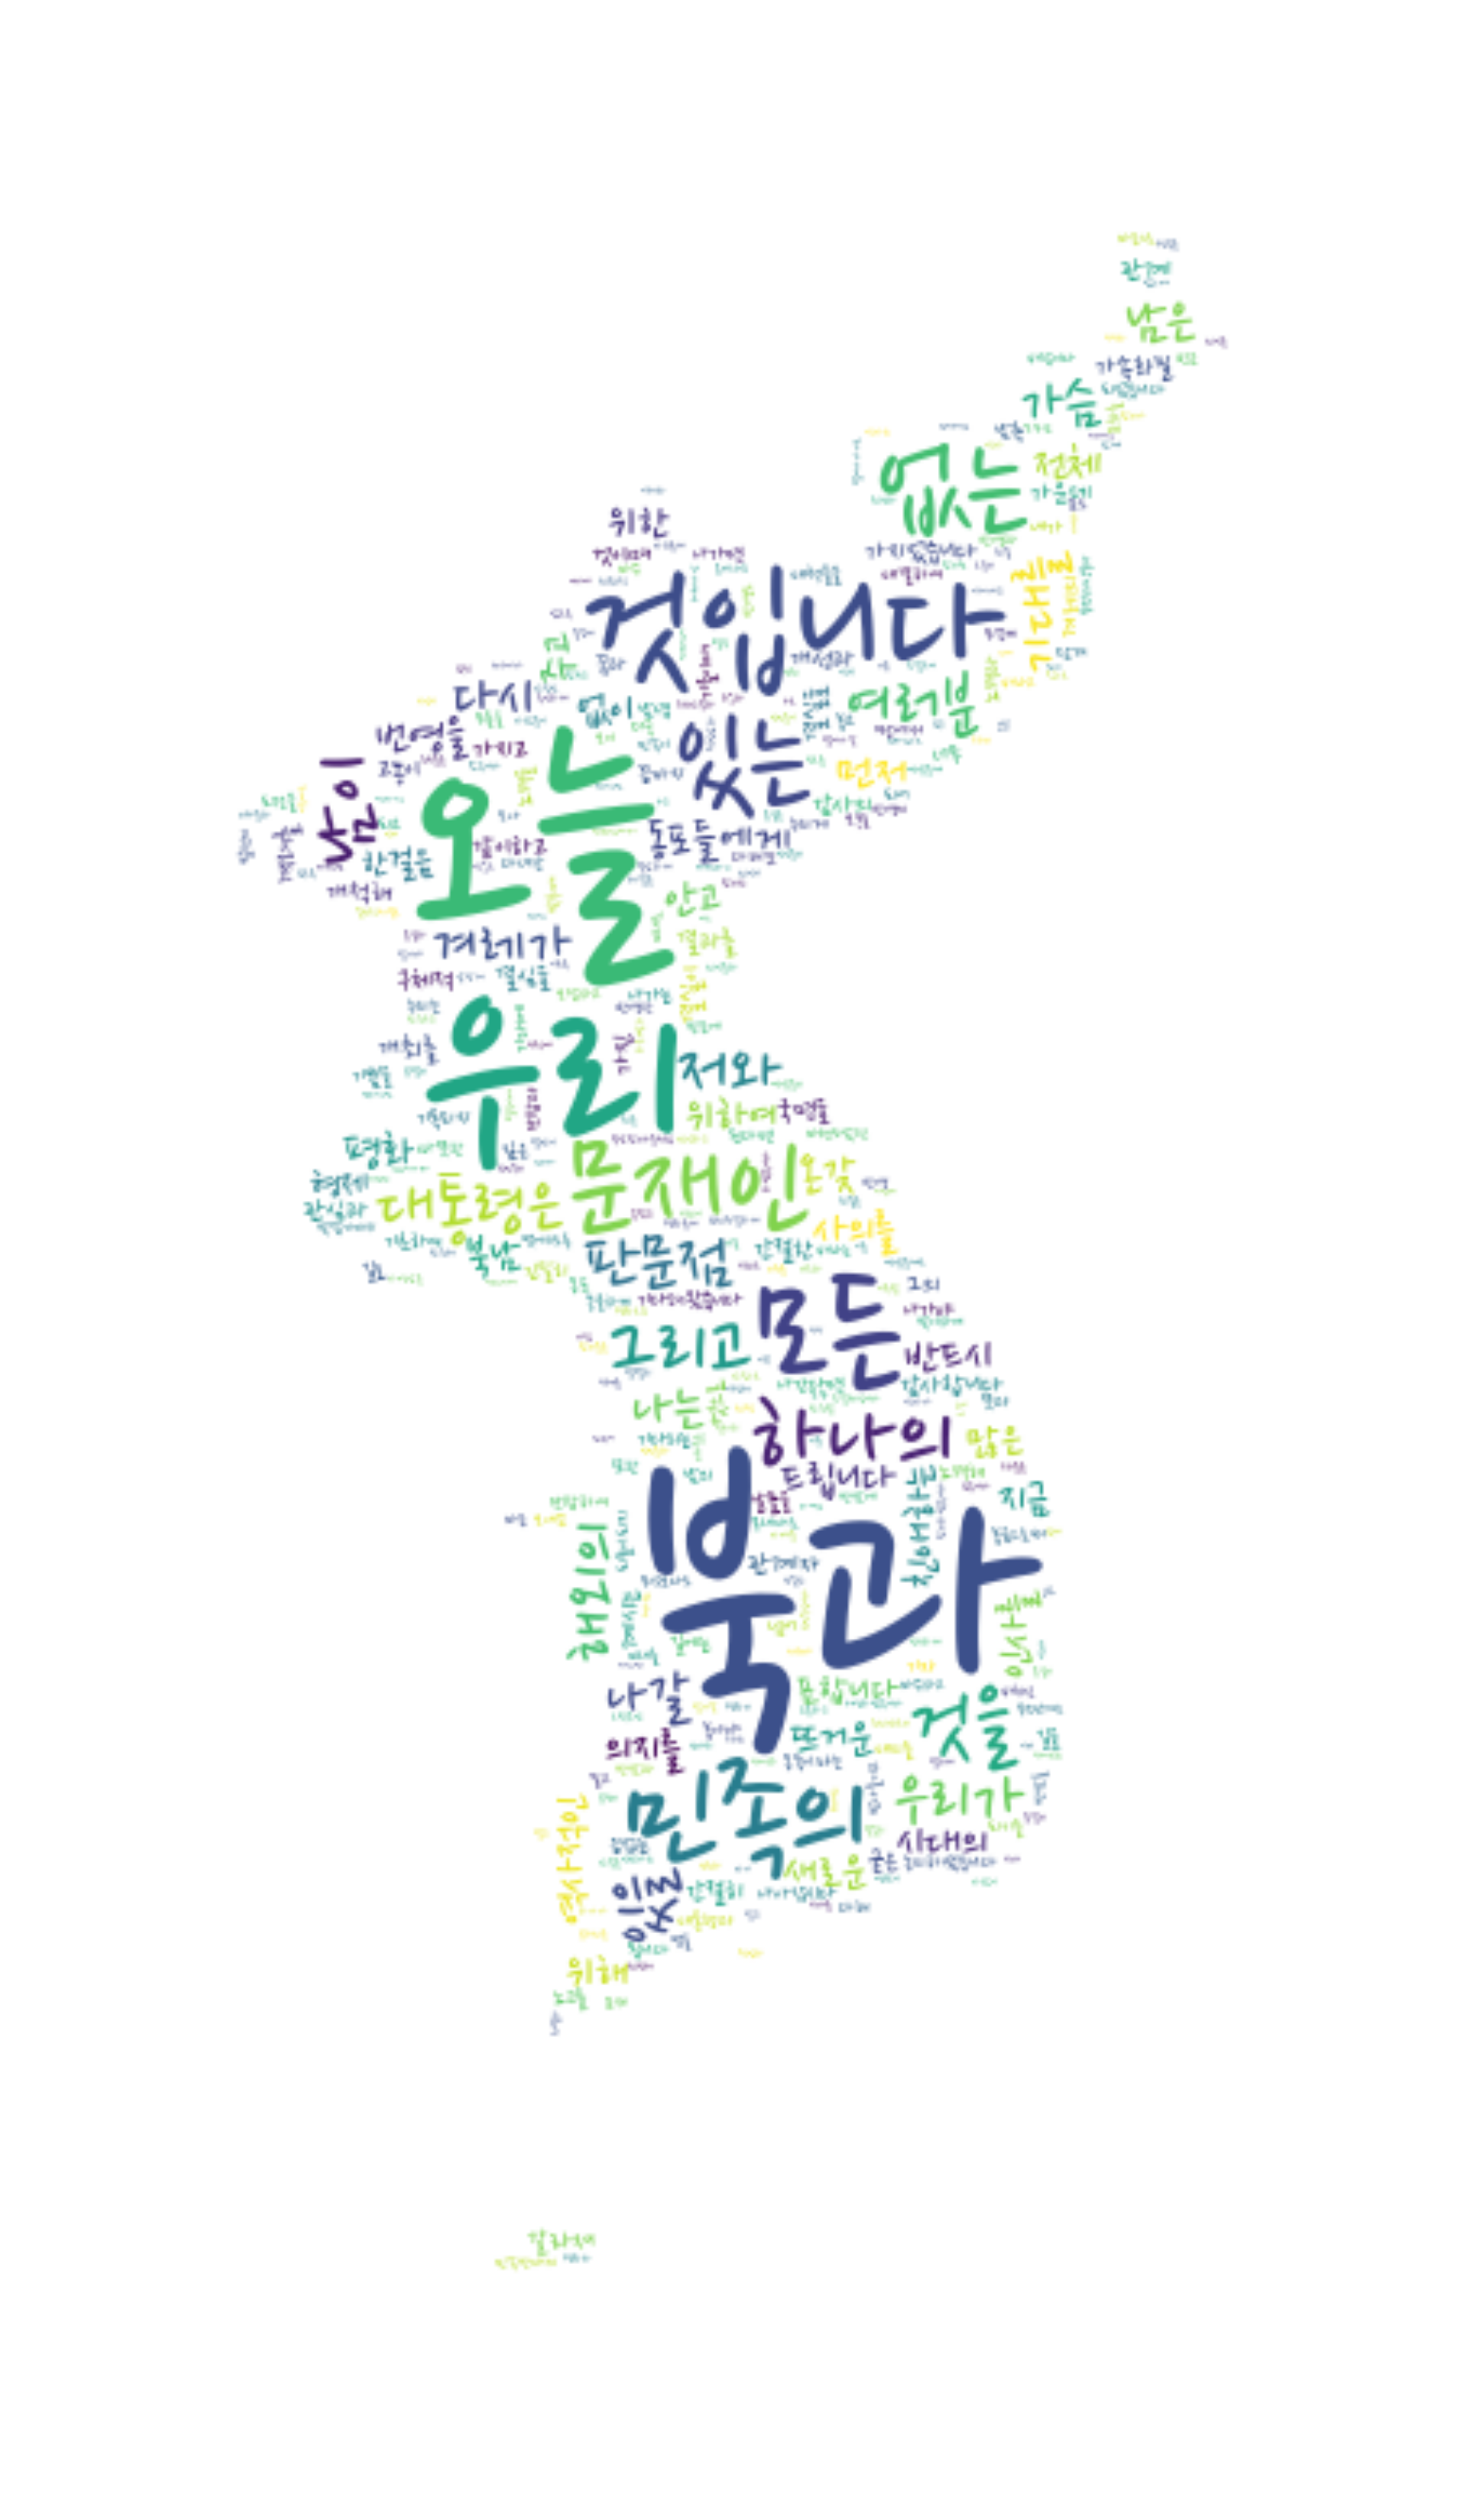

In [24]:
# 연설문 2
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict2)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("KimSpeech.png") # 그림파일로 추출하기